In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd; import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

from sklearn.metrics  import silhouette_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
'''Loading the Pre-processed Data'''
df = pd.read_csv("00_Data/processed_data.csv")

'''Normalizing the data'''
df_norm = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

X = df_norm.drop('expenses', axis=1)
y = df_norm['expenses']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=23)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (1132, 9)
Testing data shape: (200, 9)
Training labels shape: (1132,)
Testing labels shape: (200,)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)
model.compile(optimizer=optimizer, loss='mse')

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_best_only=True)

In [30]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test),verbose=1,callbacks=[checkpoint_callback])

Epoch 1/1000
36/36 [==============================] - 1s 8ms/step - loss: 0.0755 - val_loss: 0.0725
Epoch 2/1000
36/36 [==============================] - 0s 10ms/step - loss: 0.0700 - val_loss: 0.0673
Epoch 3/1000
36/36 [==============================] - 0s 12ms/step - loss: 0.0651 - val_loss: 0.0627
Epoch 4/1000
36/36 [==============================] - 0s 11ms/step - loss: 0.0607 - val_loss: 0.0585
Epoch 5/1000
36/36 [==============================] - 0s 13ms/step - loss: 0.0568 - val_loss: 0.0548
Epoch 6/1000
36/36 [==============================] - 0s 12ms/step - loss: 0.0533 - val_loss: 0.0515
Epoch 7/1000
36/36 [==============================] - 1s 15ms/step - loss: 0.0502 - val_loss: 0.0485
Epoch 8/1000
36/36 [==============================] - 0s 14ms/step - loss: 0.0473 - val_loss: 0.0459
Epoch 9/1000
36/36 [==============================] - 1s 14ms/step - loss: 0.0448 - val_loss: 0.0433
Epoch 10/1000
36/36 [==============================] - 1s 15ms/step - loss: 0.0425 - val_los

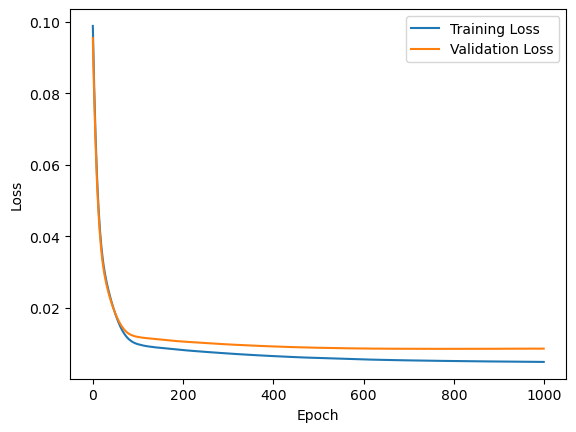

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.5f" % mse)

7/7 [==============================] - 0s 1ms/step
Mean Squared Error: 0.00864
